In [ ]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
# Interpolation kernel
def u(s, a):
    if (abs(s) >= 0) & (abs(s) <= 1):
        return (a+2)*(abs(s)**3)-(a+3)*(abs(s)**2)+1
    elif (abs(s) > 1) & (abs(s) <= 2):
        return a*(abs(s)**3)-(5*a)*(abs(s)**2)+(8*a)*abs(s)-4*a
    return 0  

In [ ]:
# Padding
def padding(img, H, W):
    zimg = np.zeros((H+4, W+4))
    zimg[2:H+2, 2:W+2, ] = img
      
    # Pad the first/last two col and row
    zimg[2:H+2, 0:2] = img[:, 0:1]
    zimg[H+2:H+4, 2:W+2] = img[H-1:H, :]
    zimg[2:H+2, W+2:W+4] = img[:, W-1:W]
    zimg[0:2, 2:W+2] = img[0:1, :]
      
    # Pad the missing eight points
    zimg[0:2, 0:2] = img[0, 0]
    zimg[H+2:H+4, 0:2] = img[H-1, 0]
    zimg[H+2:H+4, W+2:W+4] = img[H-1, W-1]
    zimg[0:2, W+2:W+4] = img[0, W-1]
    return zimg

In [ ]:
# Bicubic operation
def bicubic(img, ratio, a):
    
    # Get image size
    H, W = img.shape
      
    # Here H = Height, W = weight,
    # C = Number of channels if the 
    # image is coloured.
    img = padding(img, H, W)
      
    # Create new image
    dH = math.floor(H*ratio)
    dW = math.floor(W*ratio)
  
    # Converting into matrix
    dst = np.zeros((dH, dW))  
    # np.zeroes generates a matrix 
    # consisting only of zeroes
    # Here we initialize our answer 
    # (dst) as zero
  
    h = 1/ratio
  
    print('Start bicubic interpolation')
    print('It will take a little while...')
    inc = 0
    
    for j in range(dH):
      for i in range(dW):
        # Getting the coordinates of the
        # nearby values
        x, y = i * h + 2, j * h + 2
  
        x1 = 1 + x - math.floor(x)
        x2 = x - math.floor(x)
        x3 = math.floor(x) + 1 - x
        x4 = math.floor(x) + 2 - x
  
        y1 = 1 + y - math.floor(y)
        y2 = y - math.floor(y)
        y3 = math.floor(y) + 1 - y
        y4 = math.floor(y) + 2 - y
                  
                # Considering all nearby 16 values
        mat_l = np.matrix([[u(x1, a), u(x2, a), u(x3, a), u(x4, a)]])
        mat_m = np.matrix([[img[int(y-y1), int(x-x1)],img[int(y-y2), int(x-x1)],img[int(y+y3), int(x-x1)],
                                    img[int(y+y4), int(x-x1)]],
                                   [img[int(y-y1), int(x-x2)],
                                    img[int(y-y2), int(x-x2)],
                                    img[int(y+y3), int(x-x2)],
                                    img[int(y+y4), int(x-x2)]],
                                   [img[int(y-y1), int(x+x3)],
                                    img[int(y-y2), int(x+x3)],
                                    img[int(y+y3), int(x+x3)],
                                    img[int(y+y4), int(x+x3)]],
                                   [img[int(y-y1), int(x+x4)],
                                    img[int(y-y2), int(x+x4)],
                                    img[int(y+y3), int(x+x4)],
                                    img[int(y+y4), int(x+x4)]]])
        mat_r = np.matrix([[u(y1, a)], [u(y2, a)], [u(y3, a)], [u(y4, a)]])
                  
                # Here the dot function is used to get 
                # the dot product of 2 matrices
        dst[j, i] = np.dot(np.dot(mat_l, mat_m), mat_r)
  
    # If there is an error message, it
    # directly goes to stderr
    return dst

In [ ]:
# Read image
# You can put your input image over 
# here to run bicubic interpolation
# The read function of Open CV is used
# for this task
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lenna.png')
img = 0.289*image[:,:,0] + 0.587*image[:,:,1] + 0.114*image[:,:,2]
  
# Scale factor
ratio = 2
# Coefficient
a = -1/2
  
# Passing the input image in the 
# bicubic function
bicubicImg = bicubic(img, ratio, a)
  
# Saving the output image
  
# display shapes of both images
print('Original Image Shape:', img.shape)
print('Generated Bicubic Image Shape:', bicubicImg.shape)

Start bicubic interpolation
It will take a little while...
Original Image Shape: (512, 512)
Generated Bicubic Image Shape: (1024, 1024)


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe092549950>,
 Text(0.5, 1.0, 'Scaled Image'))

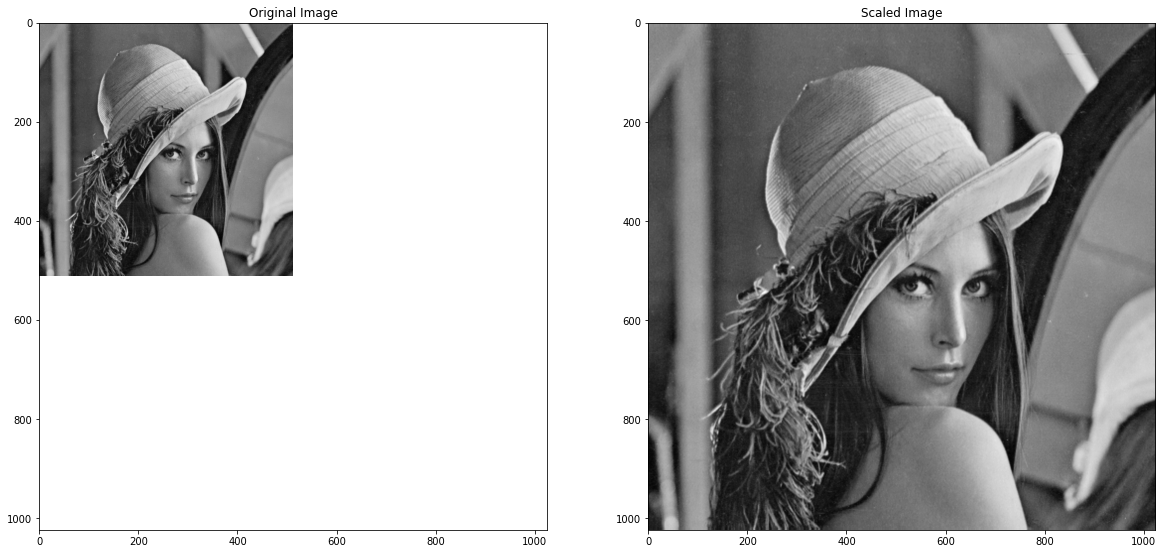

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(121), plt.imshow(img, cmap = 'gray'), plt.title("Original Image"), plt.axis(xmin = 0, xmax = 1024, ymin = 1024, ymax = 0)
plt.subplot(122), plt.imshow(bicubicImg, cmap = 'gray'), plt.title("Scaled Image")